#**The Sparks Foundation**

#**Graduate Rotational Internship Program, June 2021**

##**By: Akanksha Singh Pandaw** 
##**Function: Data Science & Business Analytics**

###***Task 1: Prediction using Supervised ML***


##**1. Importing Libraries**

In [ ]:
# Importing neccessary libraries for data manipulation and data visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

##**2. Importing the Dataset**

In [ ]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data Imported Successfully!")
df

Data Imported Successfully!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


##**3. Exploring the Dataset**

###**3.1 Determining the Shape (Rows and Columns)**

In [ ]:
df.shape

(25, 2)

###**3.2 Determining the DataTypes and Null Values**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


###**3.3 Statistical Analysis of the Data**

In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


###**3.4 Observations:**
* The Dataset has 25 rows and 2 columns
* There are NO Null values present
* The column "Hour" has datatype `float`
* The column "Score" has datatype `integer`
* Maximum and Minimum Study Hour is 9.2 and 1.1 respectively
* Maximum and Minimum Score is 95 and 17 respectively
* Mean Study Hour is 5.01
* Mean Score is 51.48

##**4. Data Visualization**

###**4.1. Using Scatter Plots**

  * Scatter plots show how much one variable is affected by another.
  * The relationship between two variables is called their correlation .
  * The closer the data points come , the higher the correlation between the two variables, or the stronger the relationship.
  * When the y variable tends to increase as the x variable increases, we say there is a positive correlation between the variables and vice versa.
  

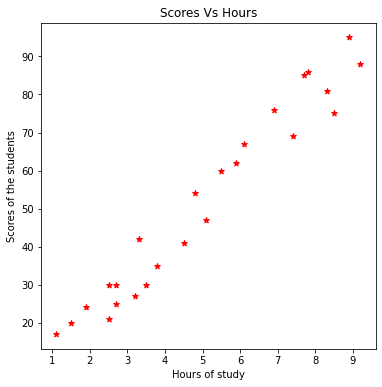

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(df['Hours'], df['Scores'], c ="red" , marker="*")
plt.title("Scores Vs Hours")
plt.xlabel("Hours of study")
plt.ylabel("Scores of the students")
plt.show()

###**4.2 Using Pie Chart**

* Used for analyzing the composition of data
* In the Pie Chart given below, each slice represents the scores obatained by the students

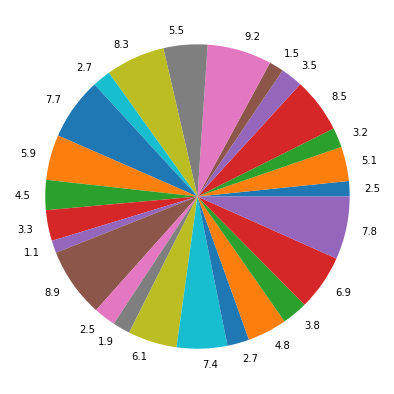

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.pie(df['Scores'], labels = df['Hours'])
plt.show()

###**4.3 Correlation HeatMap**

* It illustrates the correlation between different variables using colored cells

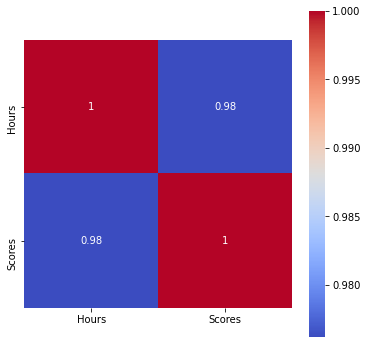

In [ ]:
plt.figure(figsize = (6,6))
sns.heatmap(df.corr(), annot = True, square=True , cmap="coolwarm")

###**4.4 Observations:**

* From the above heatmap we can observe that, `Scores` and `Hours` have a strong positive correlation.
* Due to positive correlation, if the value of one variable increases, the other will also increase
* Therefore, there is a **Linear Relationship** between `Scores` and `Hours`

##**5. Creating Linear Regression Model**

In [ ]:
X = df[["Hours"]]
y = df[["Scores"]]

###**5.1 Splitting the dataset into Train (70%) and Test Set (30%)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print("Original Size of Dataset----------->",X.shape,y.shape)
print("\nSize of X Train: ", X_train.shape)
print("\nSize of Y Train: ", y_train.shape)
print("\nSize of X Test: ", X_test.shape)
print("\nSize of Y Test: ", y_test.shape)

Original Size of Dataset-----------> (25, 1) (25, 1)

Size of X Train:  (17, 1)

Size of Y Train:  (17, 1)

Size of X Test:  (8, 1)

Size of Y Test:  (8, 1)


###**5.2 Model Training**

In [ ]:
model = LinearRegression()  
model.fit(X_train, y_train) 

print("The Model is trained!")

The Model is trained!


###**5.3 Determining Coefficient and Intercept of Linear Regression Model**

In [ ]:
print("Coefficent of the Model: ", model.coef_)
print("Intercept of the Model: ", model.intercept_)

Coefficent of the Model:  [[9.76410771]]
Intercept of the Model:  [1.3115288]


###**5.4 Visualizing the Regression Line that best fits the given data**

###**5.4.1 For Train Set**

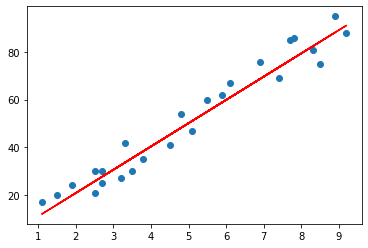

In [ ]:
reg_line = model.coef_*X + model.intercept_

plt.scatter(X , y)
plt.plot(X, reg_line , color="red")
plt.show()

###**5.4.2 For Test Set**

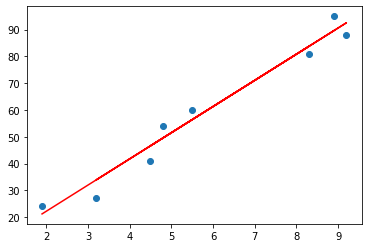

In [ ]:
reg_line_test = model.coef_*X_test + model.intercept_

plt.scatter(X_test , y_test)
plt.plot(X_test, reg_line_test , color="red")
plt.show()

##**6. Making Prediction from Regression Model**

###**6.1 Generating predictions from the Test Set**

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[68.68387198],
       [38.41513808],
       [91.1413197 ],
       [48.17924579],
       [76.49515814],
       [19.86333344],
       [58.91976427],
       [33.53308423]])

###**6.2 Comparision of Actual Vs Predicted Scores**

In [ ]:
#Creating new dataframe for comparison of actual and predicted scores

df_compare= pd.DataFrame(y_test)
df_compare['Number of Hours'] = df['Hours']
df_compare['Predicted Scores'] = y_pred

df_compare.index = np.arange(0, len(df_compare))        #Rearranging the index
df_compare = df_compare.reindex(['Number of Hours','Scores','Predicted Scores'], axis=1)      #Rearranging the columns
df_compare

,Number of Hours,Scores,Predicted Scores
0,6.9,76,68.683872
1,3.8,35,38.415138
2,9.2,88,91.141320
3,4.8,54,48.179246
4,7.7,85,76.495158
5,1.9,24,19.863333
6,5.9,62,58.919764
7,3.3,42,33.533084


##**7. Model Evaluation**

###**7.1 Model Accuracy**

In [ ]:
acc_train = model.score(X_train , y_train)
acc_train = acc_train*100

acc_test = model.score(X_test , y_test)
acc_test = acc_test*100

print("Model Accuracy with Train Set: %.2f"% acc_train)
print("Model Accuracy with Test Set:  %.2f"% acc_test) 

Model Accuracy with Train Set: 94.26
Model Accuracy with Test Set:  96.60


###**7.2 Determining the Mean Absolute and Mean Squared Error**

In [ ]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

print('Mean absolute error is: %.2f'% mae)
print('Mean squared error is: %.2f'% mse )

Mean absolute error is: 4.51
Mean squared error is: 22.16


#**Final Answer to, What will be predicted score if a student studies for 9.25 hrs/ day?**

In [ ]:
result = model.predict([[9.25]])
result

array([[94.41831286]])

In [ ]:
print("If a student studies for 9.25 hr/day, the score will be: %.2f"%result[0][0])

If a student studies for 9.25 hr/day, the score will be: 94.42
